# BIKE SHARING ASSINGMENT

A bike-sharing system needs to understand below factors to improve their business.

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

#### Importing Necessary Libraries

In [296]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split # for splliting train and test set
from sklearn.preprocessing import MinMaxScaler # for scaling

from sklearn.feature_selection import RFE #for recursive features elimination
from sklearn.linear_model import LinearRegression # sklearn linear model.

import statsmodels.api as sm #statsmodel library.

from statsmodels.stats.outliers_influence import variance_inflation_factor # for checking VIF.

from sklearn.metrics import r2_score # For checking R2 score.

### 1. READING & UNDERSTANDING DATA

In [5]:
# Importing dataset
df = pd.read_csv(r'C:\Users\tejas\Downloads\day.csv', index_col=0)

In [6]:
# Understanding columns and parameters of data.

In [7]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
df.shape

(730, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


In [10]:
## Checking for null values
df.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000



 **Inference - Data has not missing values**

In [13]:
## checking for duplicate vaules
df.drop_duplicates(subset=None, inplace=True)

In [14]:
df.shape

(730, 15)


**Inference - Data has no duplicate rows**


#### Modifying some categorical variables and removing unwanted columns

- we can see columns 'mnth','season', 'weathersit' and 'Weekday' have categorica data associated with them, current data is in int format which will not be correctly interpreted by model as they are categorical data.
- converting them into string catogorical so that we can create better understandable dummy variables for them later.
- Also we will be able to get more sophisticated Visualizations. 

In [17]:
# converting mnth to catrgorical.
df[['mnth']] = df[['mnth']].apply(lambda x : x.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}))

In [18]:
df.mnth.value_counts()

mnth
Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: count, dtype: int64

In [19]:
# converting season to catrgorical.
df[['season']] = df[['season']].apply(lambda x : x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'}))

In [20]:
df.season.value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [21]:
# converting weathersit to catrgorical.
df[['weathersit']] = df[['weathersit']].apply(lambda x : x.map({1:'Clear', 2:'Mist+Cloudy', 3:'Light Snow or light Rain', 4:'Heavy Rain+Ice Pallets'}))

In [22]:
df.weathersit.value_counts()

weathersit
Clear                       463
Mist+Cloudy                 246
Light Snow or light Rain     21
Name: count, dtype: int64

In [23]:
# Using day_name function to get respective day name for dates mentioned in dteday.
# We are using this as we are not sure which value represents which weekday, it is also not mentioned in data dictionary.

df['dteday'] = pd.to_datetime(df['dteday'], format='mixed', dayfirst=True)
df['weekday'] = df['dteday'].dt.day_name()

In [24]:
df.weekday.value_counts()

weekday
Monday       105
Tuesday      105
Wednesday    104
Thursday     104
Friday       104
Saturday     104
Sunday       104
Name: count, dtype: int64

In [25]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2018-01-01,spring,0,Jan,0,Monday,0,Mist+Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
2,2018-01-02,spring,0,Jan,0,Tuesday,0,Mist+Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
3,2018-01-03,spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,2018-01-04,spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,2018-01-05,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [26]:
## checking if all the values has cnt value as sum of casual and registered only as sainity check.

df1 = df[~(df.casual+df.registered) == df.cnt]
df1.shape

(0, 15)

In [27]:
## All the columns follow casual + regsitered = cnt



- Column dteday data is already present in other columns like yr, mnth, weekday as is not required in analysis
- cnt is defined as sum of casual and registered hence removing them as they will completely define the result variable which cannot help us identify driving factors.



In [29]:
df = df.drop(['dteday','casual','registered'], axis=1)

In [30]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,
1,spring,0,Jan,0,Monday,0,Mist+Cloudy,14.110847,18.18125,80.5833,10.749882,985
2,spring,0,Jan,0,Tuesday,0,Mist+Cloudy,14.902598,17.68695,69.6087,16.652113,801
3,spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
4,spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
5,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [31]:
df.shape

(730, 12)

### 2. EDA & DATA VISUALIZATION.

#### Univariate Analysis.

In [34]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,
1,spring,0,Jan,0,Monday,0,Mist+Cloudy,14.110847,18.18125,80.5833,10.749882,985
2,spring,0,Jan,0,Tuesday,0,Mist+Cloudy,14.902598,17.68695,69.6087,16.652113,801
3,spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
4,spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
5,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [35]:
df.holiday.value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

In [36]:
df.yr.value_counts()

yr
0    365
1    365
Name: count, dtype: int64

In [37]:
df.mnth.value_counts()

mnth
Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: count, dtype: int64

In [38]:
df.workingday.value_counts()

workingday
1    499
0    231
Name: count, dtype: int64

<Axes: xlabel='temp', ylabel='Density'>

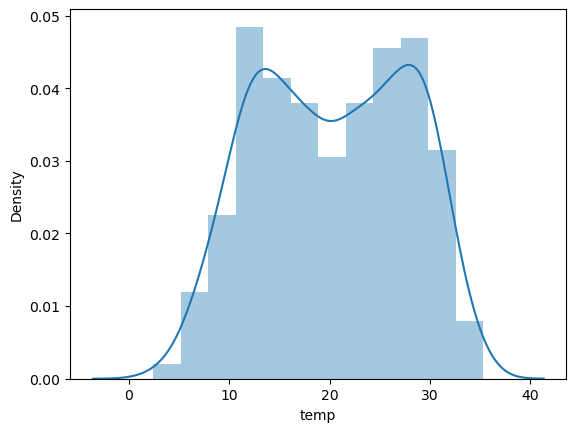

In [39]:
sns.distplot(df.temp)

<Axes: xlabel='atemp', ylabel='Density'>

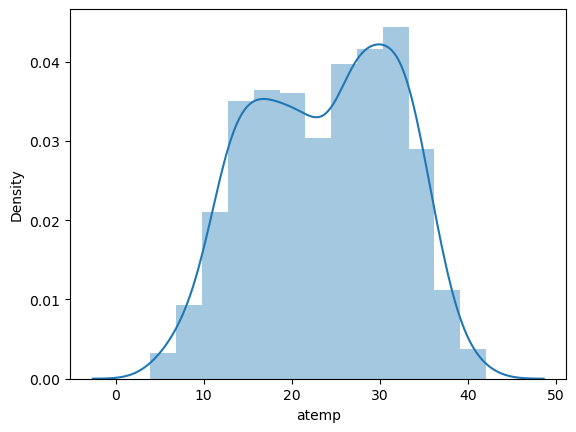

In [40]:
sns.distplot(df.atemp)

<Axes: xlabel='hum', ylabel='Density'>

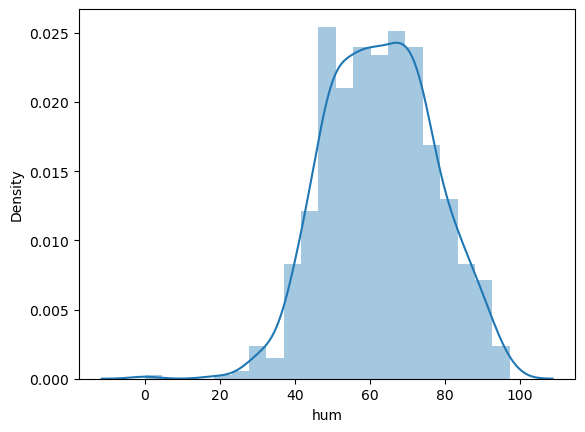

In [41]:
sns.distplot(df.hum)

<Axes: xlabel='windspeed', ylabel='Density'>

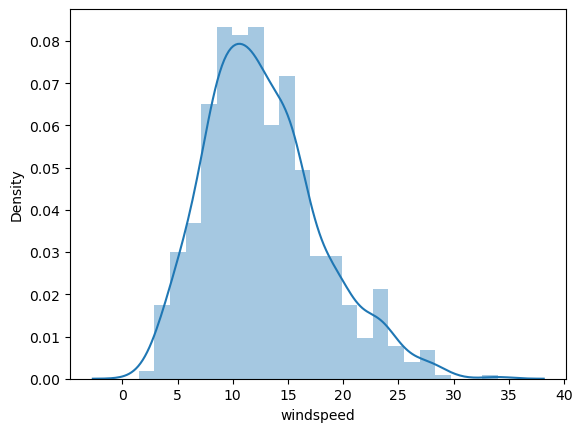

In [42]:
sns.distplot(df.windspeed)

<Axes: xlabel='cnt', ylabel='Density'>

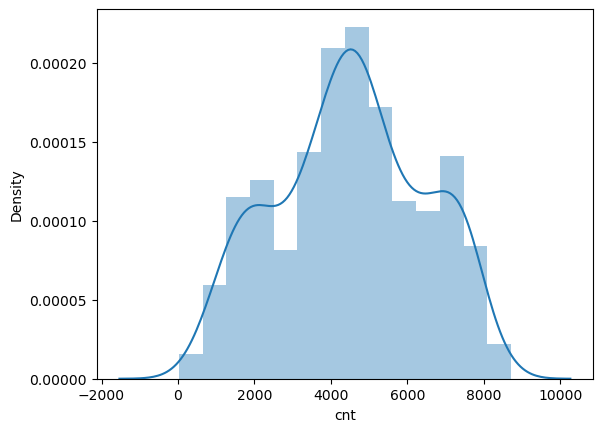

In [43]:
sns.distplot(df.cnt)

<Axes: ylabel='count'>

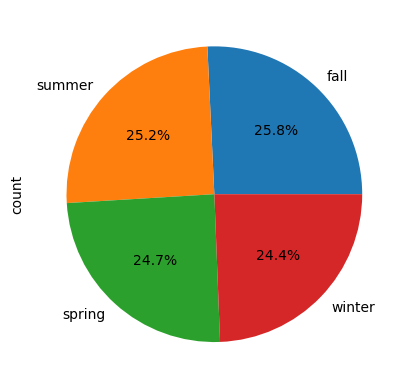

In [44]:
df.season.value_counts().plot.pie(autopct='%1.1f%%')

<Axes: xlabel='mnth'>

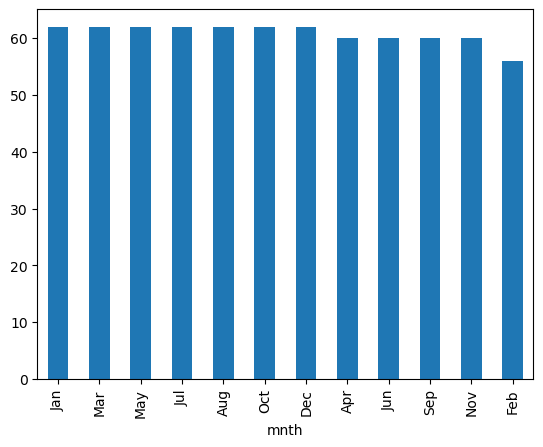

In [45]:
df.mnth.value_counts().plot.bar()

<Axes: xlabel='yr'>

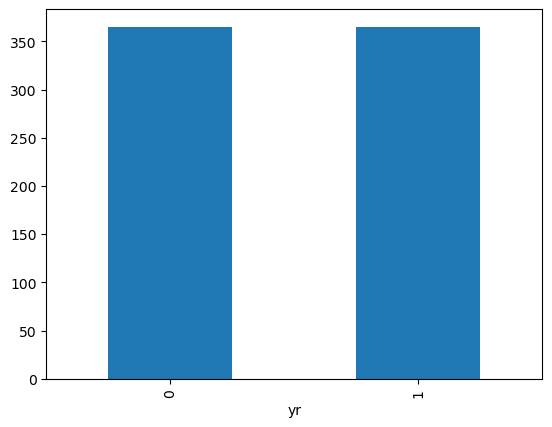

In [46]:
df.yr.value_counts().plot.bar()

<Axes: xlabel='weekday'>

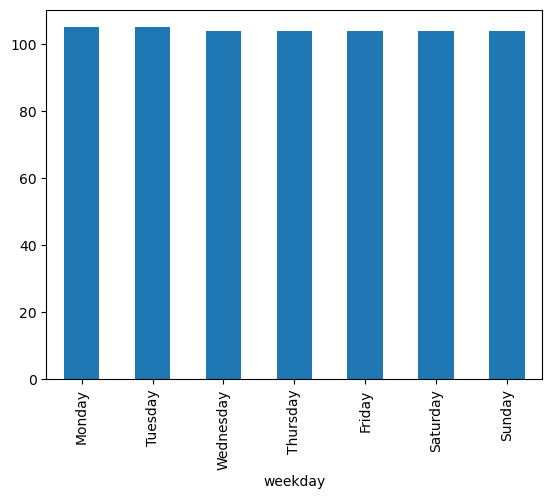

In [47]:
df.weekday.value_counts().plot.bar()

<Axes: ylabel='count'>

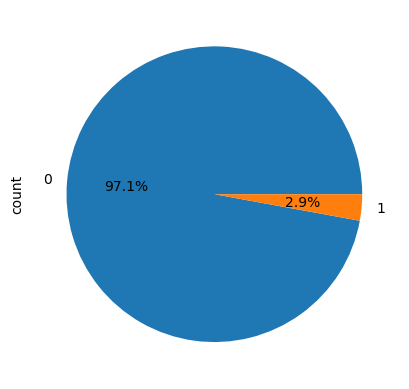

In [48]:
df.holiday.value_counts().plot.pie(autopct='%1.1f%%')

<Axes: ylabel='count'>

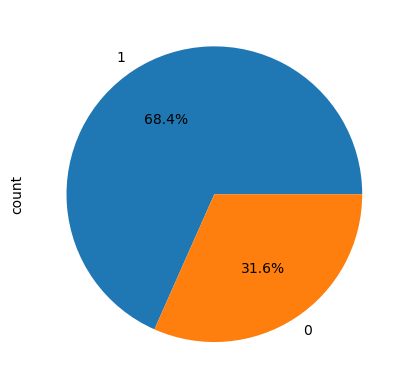

In [49]:
df.workingday.value_counts().plot.pie(autopct='%1.1f%%')

<Axes: ylabel='count'>

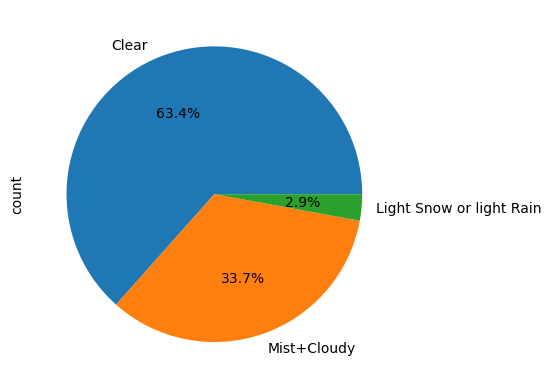

In [50]:
df.weathersit.value_counts().plot.pie(autopct='%1.1f%%')

In [51]:
df.weathersit.value_counts()

weathersit
Clear                       463
Mist+Cloudy                 246
Light Snow or light Rain     21
Name: count, dtype: int64

#### Bivariate Analysis

In [53]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,
1,spring,0,Jan,0,Monday,0,Mist+Cloudy,14.110847,18.18125,80.5833,10.749882,985
2,spring,0,Jan,0,Tuesday,0,Mist+Cloudy,14.902598,17.68695,69.6087,16.652113,801
3,spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
4,spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
5,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


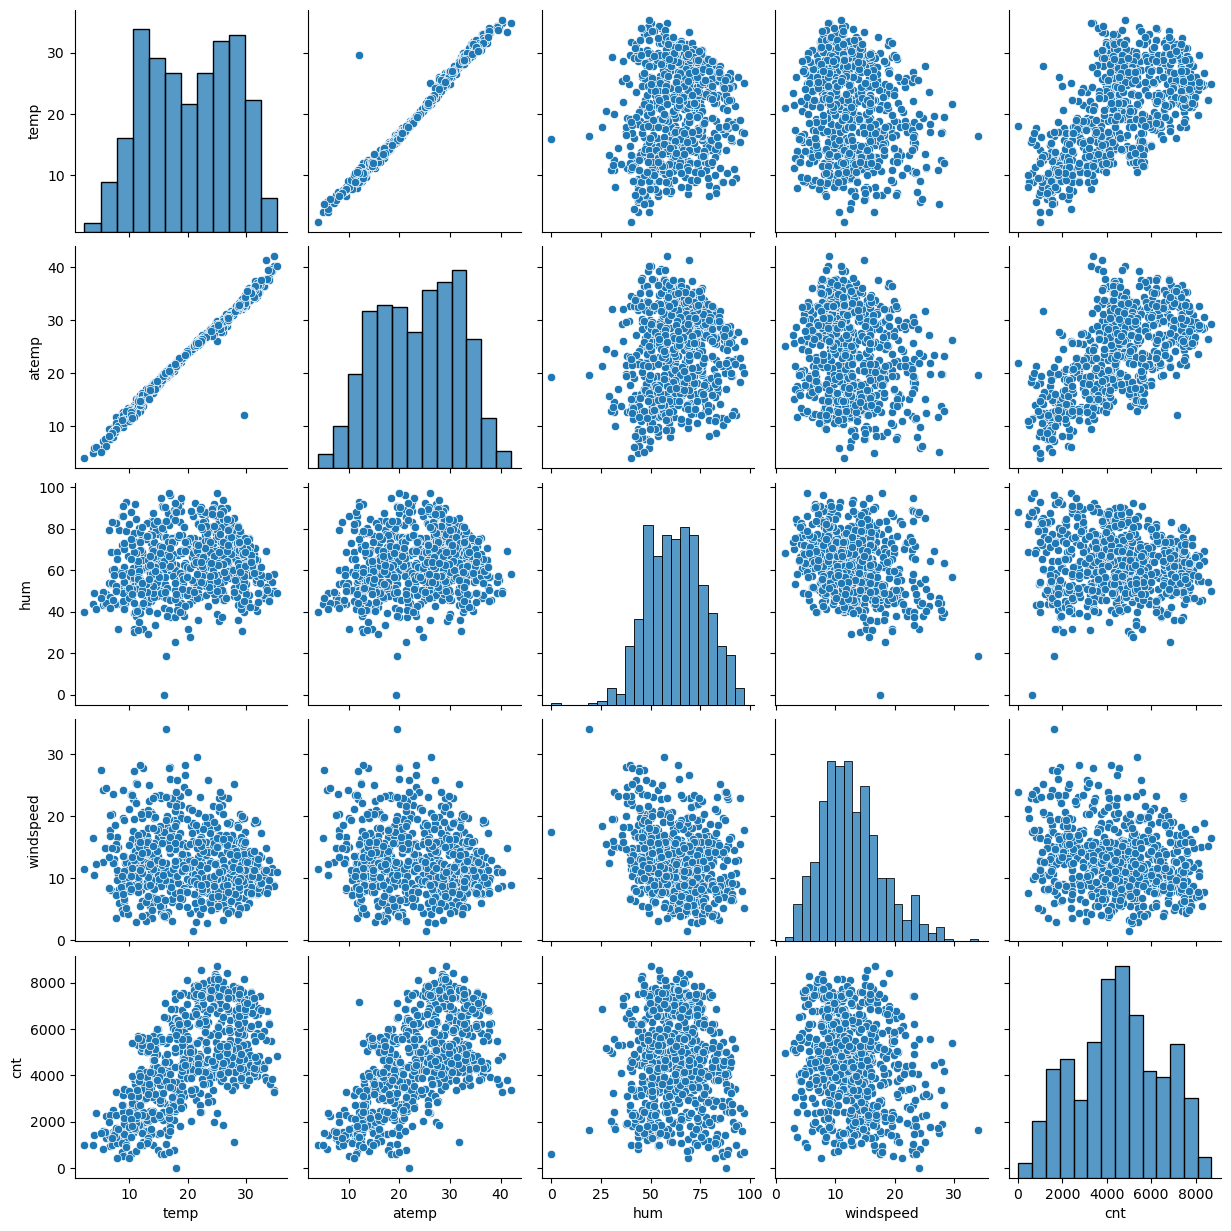

In [54]:
sns.pairplot(df[['temp','atemp','hum','windspeed','cnt']])

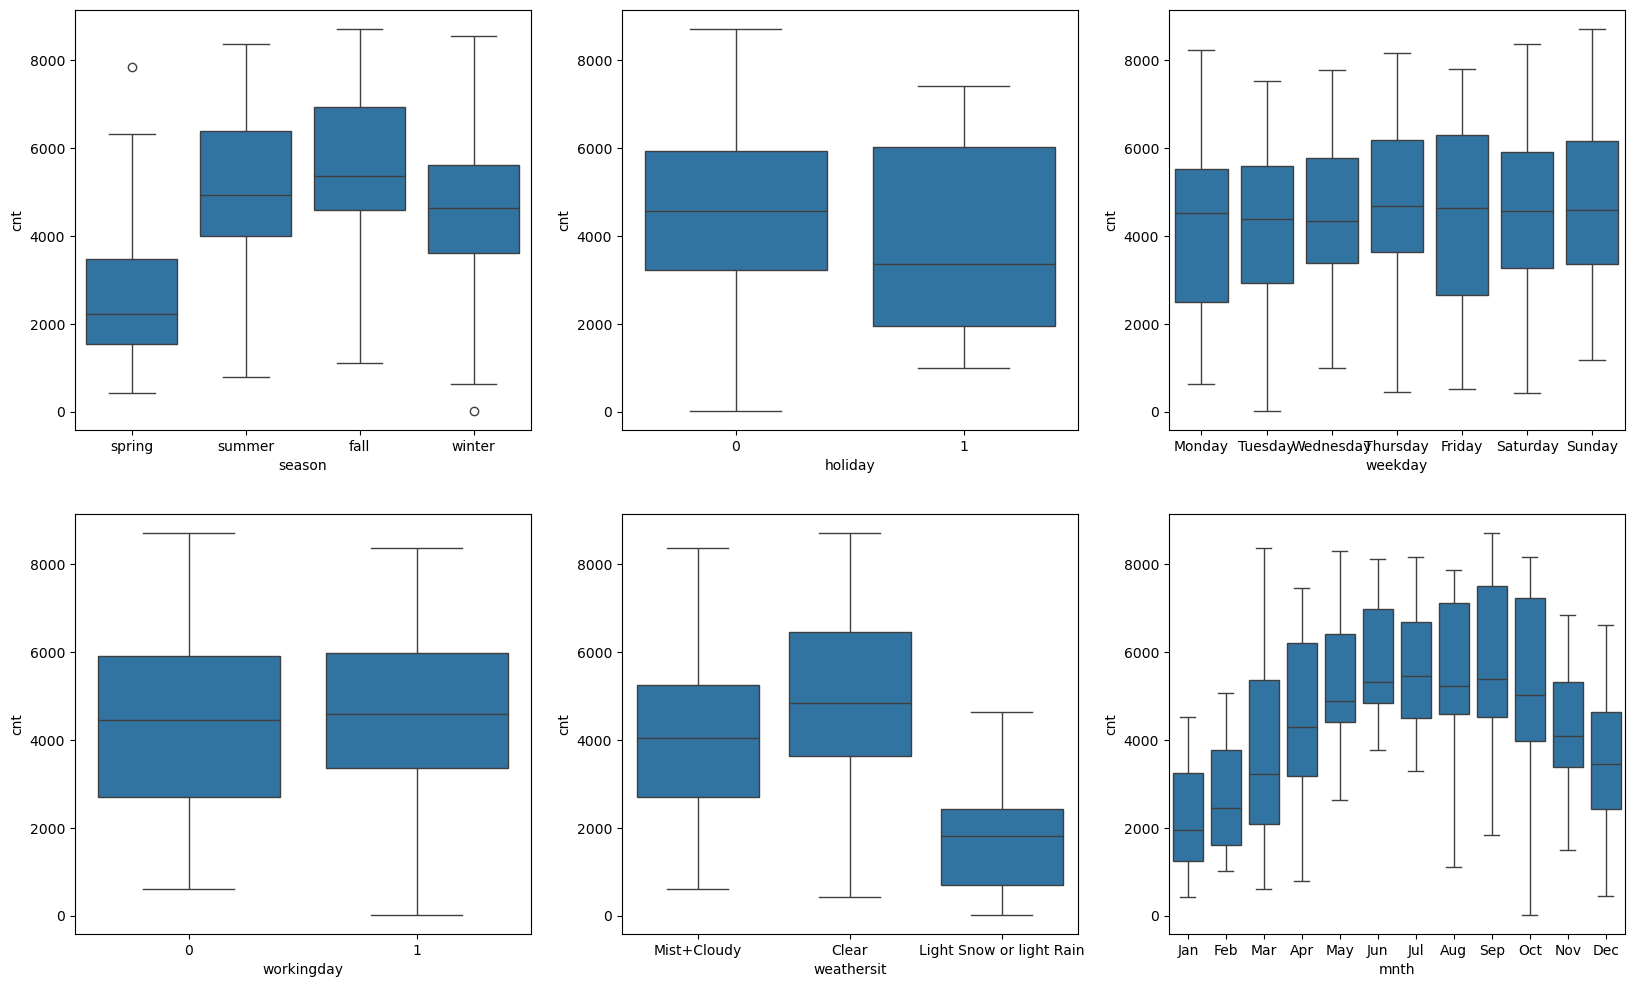

In [55]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.show()

<Axes: xlabel='yr', ylabel='cnt'>

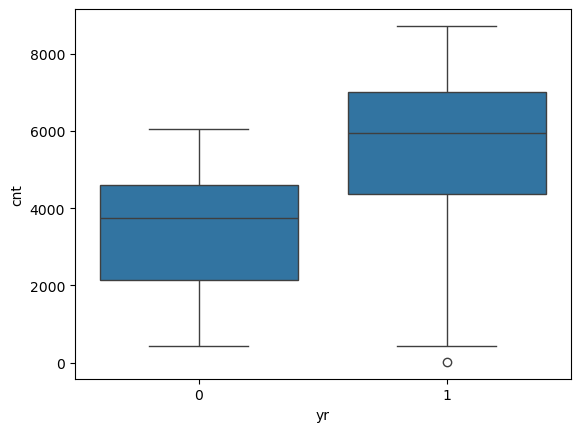

In [56]:
sns.boxplot(data=df, x = 'yr', y= 'cnt')

#### Multivariate Analysis

<Axes: xlabel='mnth', ylabel='cnt'>

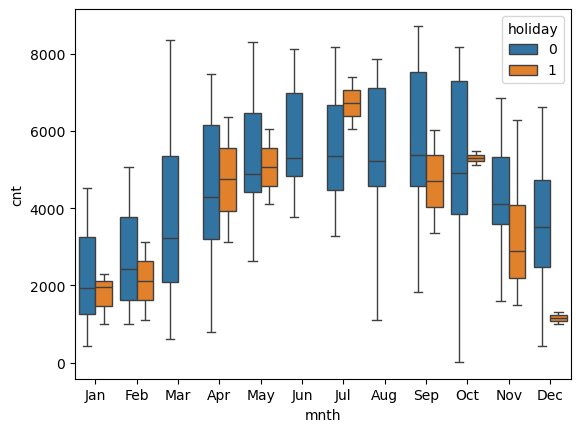

In [58]:
sns.boxplot(data=df, x = 'mnth', y= 'cnt', hue='holiday')

<Axes: xlabel='weathersit', ylabel='cnt'>

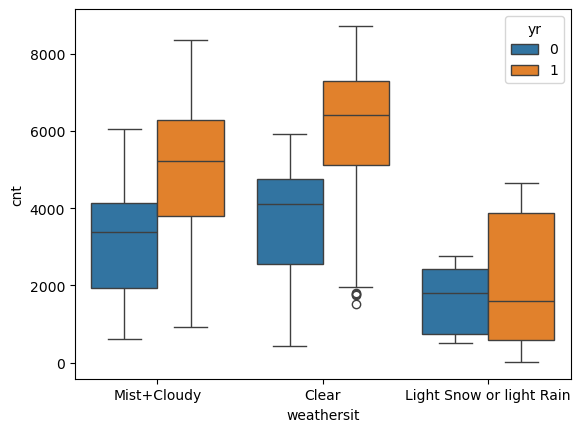

In [59]:
sns.boxplot(data=df, x = 'weathersit', y= 'cnt', hue='yr')

<Axes: xlabel='season', ylabel='cnt'>

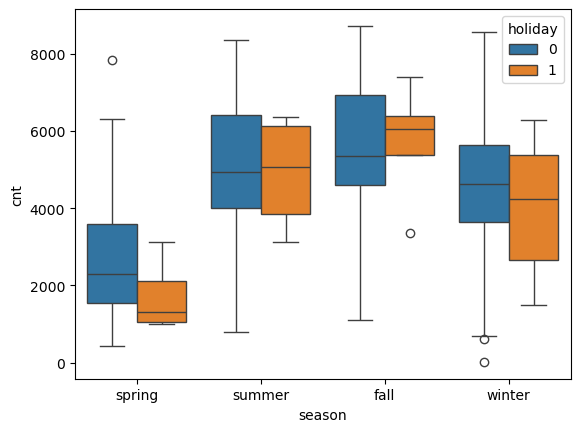

In [60]:
sns.boxplot(data=df, x = 'season', y= 'cnt', hue='holiday')

<Axes: >

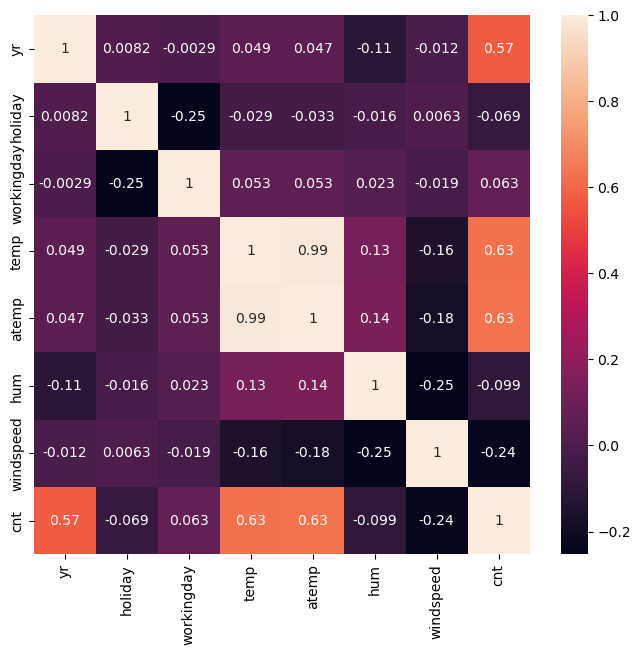

In [61]:
plt.figure(figsize=(8,7))
sns.heatmap((df[['yr','holiday','workingday','temp','atemp','hum','windspeed','cnt']].corr()), annot=True)

#### Inference from EDA.
<br>

 __Uni-Variate Analysis__
- We can see all the continous variables follow somewhat a normal distribution having a bell curve.
- there are no outliers that might impact analysis hence not required to be removed.
- temperature lies between 2 degree to 35 degree over the year.
- All seasons have equal proportions throughout yrar.
- 3% of days are holiday
- nearly 70% of days are week days or working days and rest are weekends+holidays.
- mostly weather is clear, sometimes clouday and very rare to have light rain or snow, not adverse weather in past 2 year.
- customer count on dalily basis lies between 22 to 8714 in past 2 years.
<br>

__Bi-Variate Analysis__
- From scatter plot we can see temperature and feeling temperature follow a very linear relation, this is expected as feeling temerature is calculated using teamerature only keeping humidity and windspeed into account.
- Temperature and feeling temperature follows a linear relationship with number of customers as well.
- Customer count seems high on friday.
- Mean customers are a little higher on working day than on non working day, but on holidays(weekend excluded) mean value is very low.
- Clear weather leads to more customers.
- customer count increases from january(mean count in Jan - nearly 2000) and keeps on increase till september where it has highest values( nearly 5000), after that it decreases till december(mean count - nearly3000)
- Business has increases by great margin in 2019.
<br>

__Multi-Variate Analysis__
- Variables year, temperature and feeling temperature have high corelation with count of customers values 0.57, 0.63 and 0.63 respectively.
- Windspeed and humidity are negatively corellated with count of customers having values -0.24 and -.01 respectively.
- In summers and winters holiday accounts for much more customers than on other seasons.
- in july holidays have higher mean and max customers in holidays than on weekdays and weekends unlike other months.



### 3. Data Preparation.

In [64]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,
1,spring,0,Jan,0,Monday,0,Mist+Cloudy,14.110847,18.18125,80.5833,10.749882,985
2,spring,0,Jan,0,Tuesday,0,Mist+Cloudy,14.902598,17.68695,69.6087,16.652113,801
3,spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
4,spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
5,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [65]:
# creating dummy variables for required categorical variables.
# variables year, holiday, workingday already has 0 and 1 values so no need to make nay changes on them
# we need to create dummy variables for season, month, weekday and weathersit.

In [66]:
## creating dummy for season
season = pd.get_dummies(df.season, dtype=int, drop_first=True)

In [67]:
season.head()

,spring,summer,winter
instant,,,
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0


In [68]:
## creating dummy for month
month = pd.get_dummies(df.mnth, dtype=int, drop_first=True)

In [69]:
month.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
instant,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,0


In [70]:
## creating dummy for week
week = pd.get_dummies(df.weekday, dtype=int, drop_first=True)

In [71]:
week.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
instant,,,,,,
1,1,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,0,0,0


In [72]:
## creating dummy for weather situation
ws = pd.get_dummies(df.weathersit, dtype=int, drop_first=True)

In [73]:
ws.head()

,Light Snow or light Rain,Mist+Cloudy
instant,,
1,0,1
2,0,1
3,0,0
4,0,0
5,0,0


In [74]:
df = pd.concat([df,season,month,week,ws],axis=1) # Merging all the dummy variables in data set.

In [75]:
df = df.drop(['season','mnth','weekday','weathersit'],axis=1) # dropping columns for which dummy were created

In [76]:
## setting options so that we can see the data frame completely.
pd.set_option('display.max_columns', 100)

In [77]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow or light Rain,Mist+Cloudy
instant,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [78]:
## Changing column name type to string so that in will not cause any issue in further analysis.
df.columns = df.columns.astype(str)

In [79]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul',
       'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'Light Snow or light Rain', 'Mist+Cloudy'],
      dtype='object')

### 4. SPLITTING DATA INTO TRAIN AND TEST SET.

In [81]:
# Splitting data into train and test set using train_test_split function into 70/30 proportion.

In [82]:
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)

In [83]:
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [84]:
# Minmax scaling the continous variables so that interpretation will be easy and computation will be less.

In [85]:
scaler = MinMaxScaler()
df_train[['temp','atemp','hum','windspeed','cnt']] = scaler.fit_transform(df_train[['temp','atemp','hum','windspeed','cnt']])

In [86]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow or light Rain,Mist+Cloudy
instant,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
577,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
427,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
729,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
483,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
112,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [87]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow or light Rain,Mist+Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

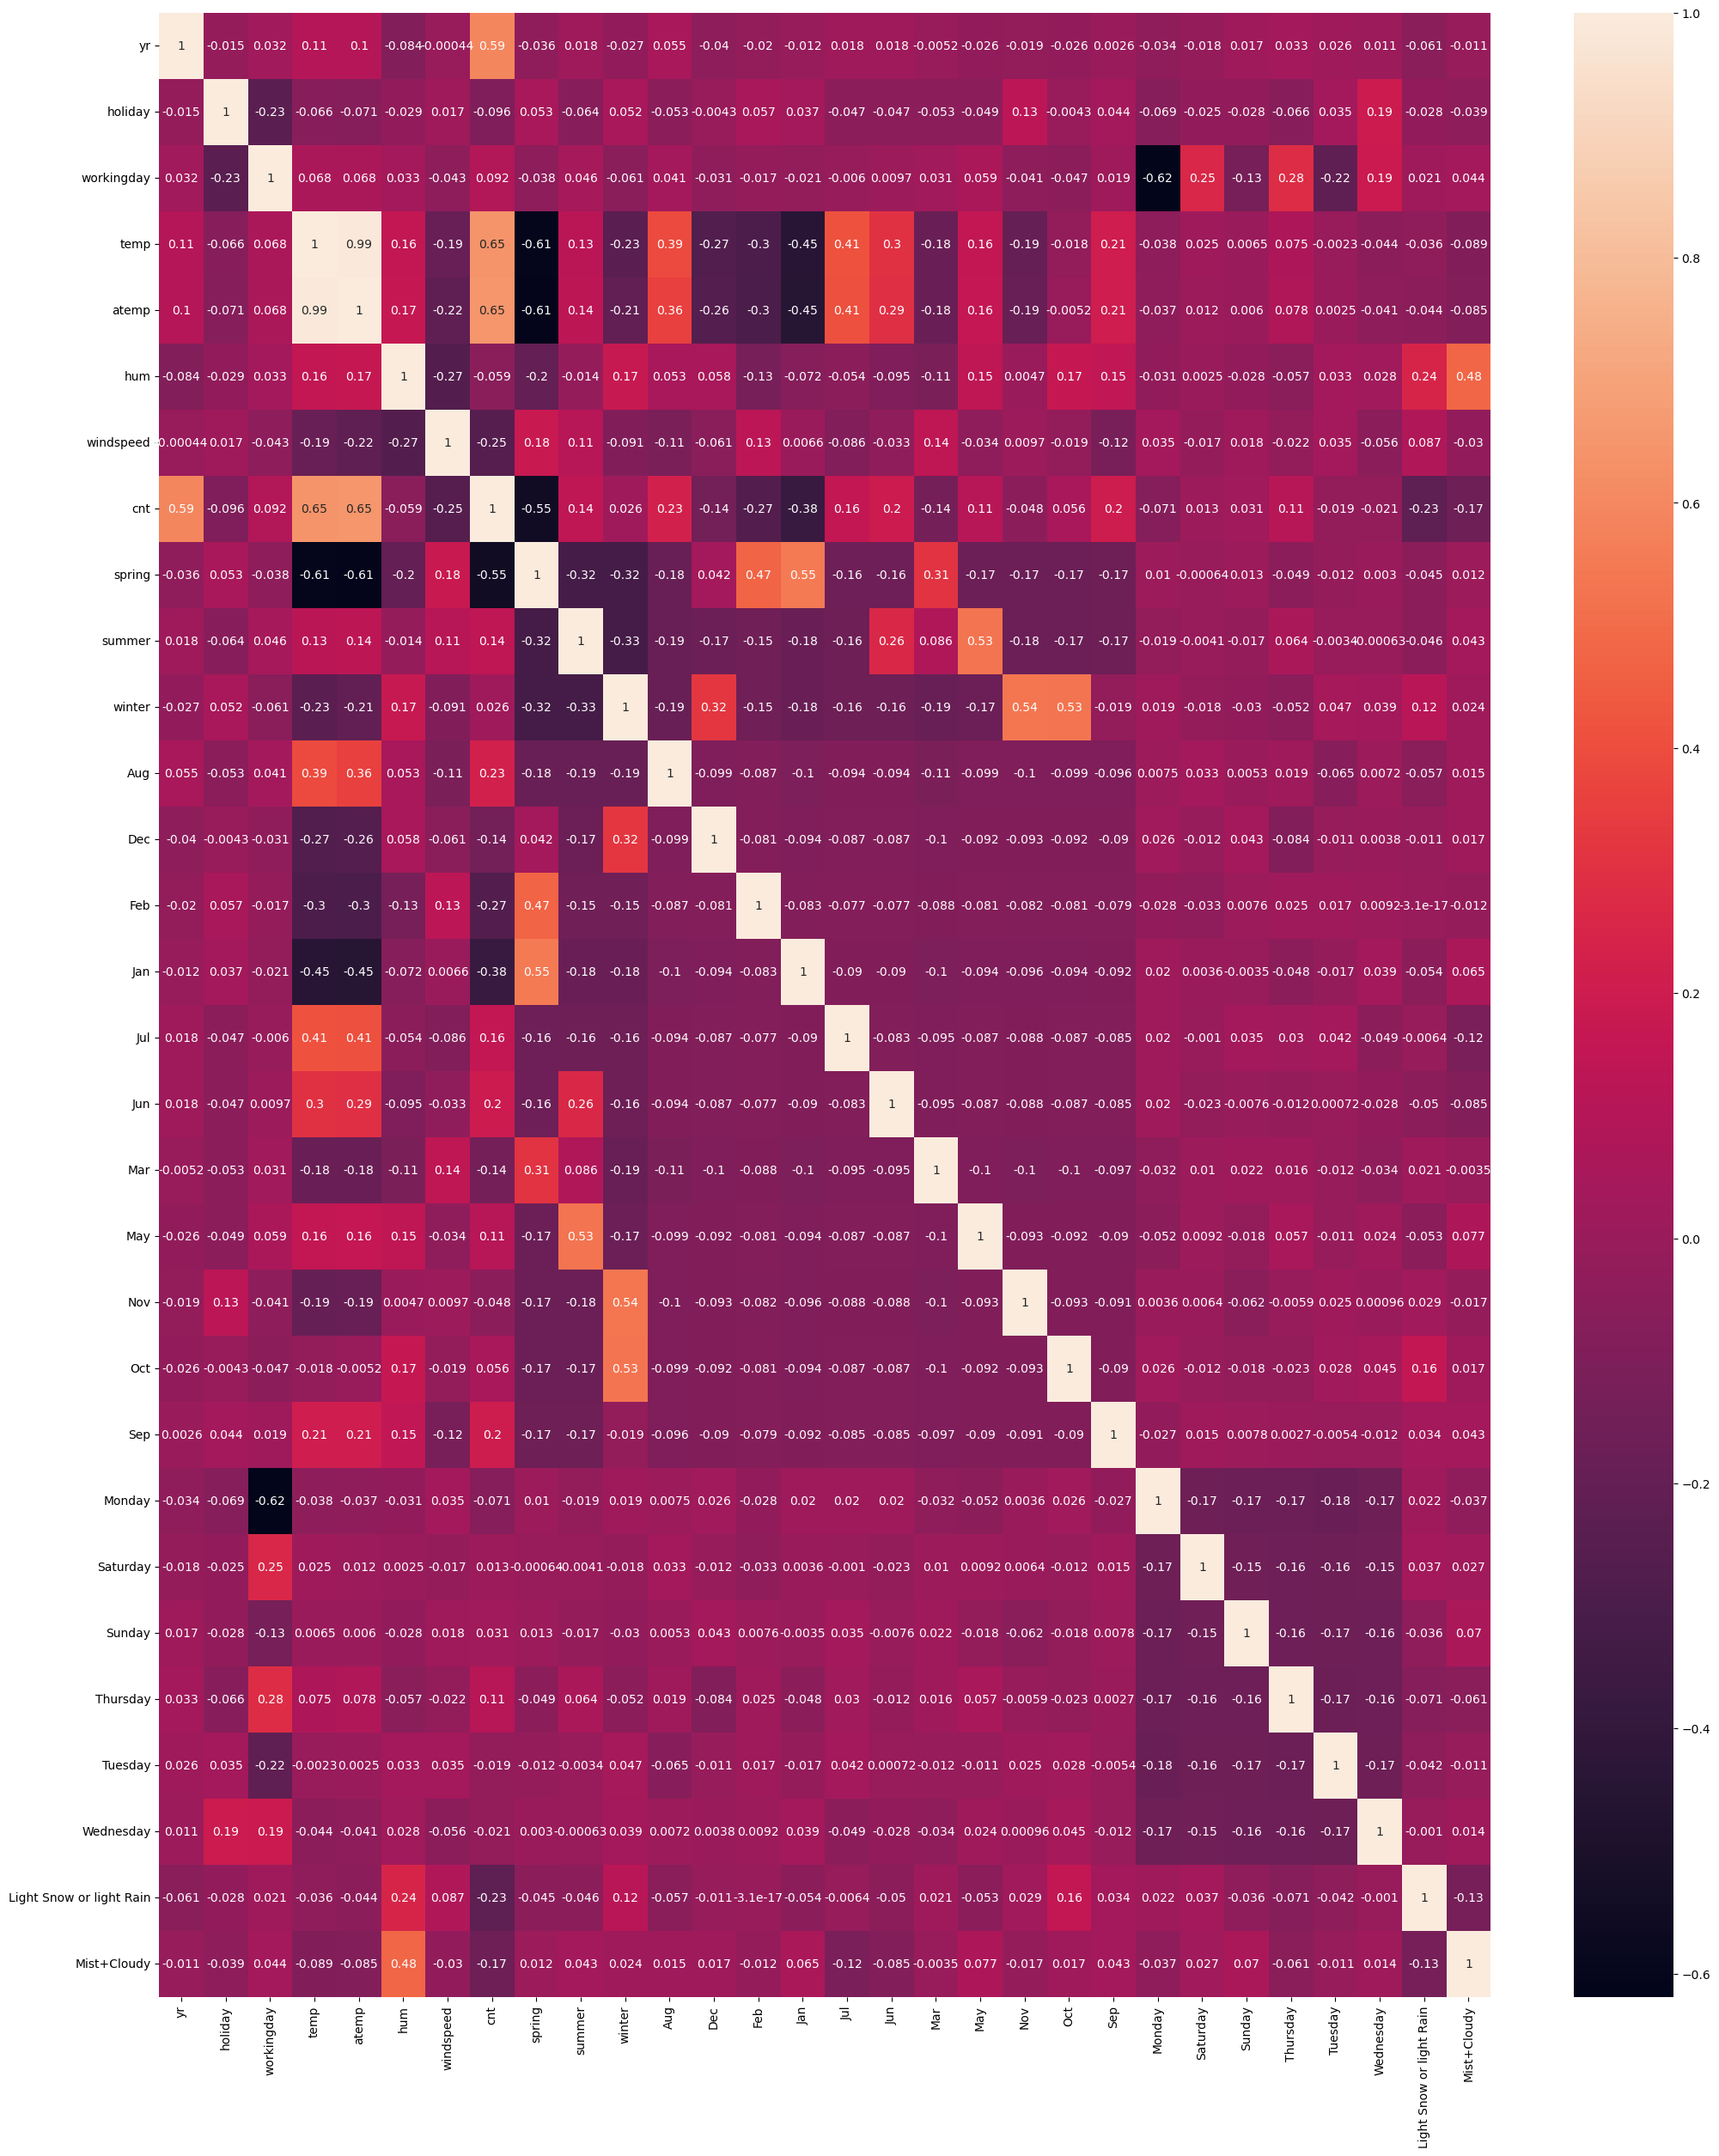

In [88]:
plt.figure(figsize=(25,30))
sns.heatmap(df_train.corr(), annot=True)

We can see not all the variables are in numeric format and scaled between 0 and 1, which is good for creating a model.

In [90]:
# creating X_train and y_train set to build model.
y_train = df_train.pop('cnt')
X_train = df_train

In [91]:
y_train.head()

instant
577    0.827658
427    0.465255
729    0.204096
483    0.482973
112    0.191095
Name: cnt, dtype: float64

In [92]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow or light Rain,Mist+Cloudy
instant,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
577,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
427,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
729,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
483,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
112,0,0,1,0.345824,0.318819,0.751824,0.380981,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


### 5. SELECTING FEATURES USING RECURSIVE FEATURES ELEMINATION.

In [94]:
X_train.shape

(510, 29)

In [95]:
# Selecting top 15 features out of all in the data set.
lm = LinearRegression()
selector = RFE(lm, n_features_to_select=15)
selector = selector.fit(X_train,y_train)

In [96]:
selector.support_

array([ True,  True, False,  True, False,  True,  True,  True,  True,
        True, False,  True, False,  True,  True, False, False, False,
        True, False,  True, False, False, False, False, False, False,
        True,  True])

In [97]:
# Checking columns which are selected and priorities of non selected features.
list(zip(X_train.columns,selector.support_,selector.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 15),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 7),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 9),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', True, 1),
 ('Oct', False, 11),
 ('Sep', True, 1),
 ('Monday', False, 5),
 ('Saturday', False, 13),
 ('Sunday', False, 10),
 ('Thursday', False, 12),
 ('Tuesday', False, 4),
 ('Wednesday', False, 8),
 ('Light Snow or light Rain', True, 1),
 ('Mist+Cloudy', True, 1)]

In [98]:
sel_col = X_train.columns[selector.support_]
sel_col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep', 'Light Snow or light Rain',
       'Mist+Cloudy'],
      dtype='object')

In [99]:
X_train_rfe = X_train[sel_col]

In [100]:
X_train_rfe.head()

,yr,holiday,temp,hum,windspeed,spring,summer,winter,Dec,Jan,Jul,Nov,Sep,Light Snow or light Rain,Mist+Cloudy
instant,,,,,,,,,,,,,,,
577,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0
427,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1
729,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0
483,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,1
112,0,0,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,0,1


### 6. CREATING LINEAR MODEL.

In [102]:
# Adding constant in train set as a prerequisite for statsmodel.
X_train_sm1 = sm.add_constant(X_train_rfe)

In [103]:
X_train_sm1.head()

,const,yr,holiday,temp,hum,windspeed,spring,summer,winter,Dec,Jan,Jul,Nov,Sep,Light Snow or light Rain,Mist+Cloudy
instant,,,,,,,,,,,,,,,,
577,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0
427,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1
729,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0
483,1.0,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,1
112,1.0,0,0,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,0,1


In [104]:
# creating first model.
lm1 = sm.OLS(y_train, X_train_sm1)
res1 = lm1.fit()

In [105]:
# Checking model parameters.
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          8.15e-189
Time:                        15:24:16   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.3197      0.036      8.859      0.000       0.249       0.391
yr                           0.2304      0.008     28.487      0.000       0.215       0.246
holiday                     -0.0911      0.026     -3.557      0.000      -0.141      -0.041
temp                         0.4815      0.037     13.005      0.000       0.409       0.554
hum                         -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed                   -0.1887      0.026     -7.315      0.000      -0.239      -0.138
spring                      -0.0613      0.021     -2.881      0.004      -0.103      -0.019
summer                       0.0423      0.015      2.761      0.006       0.012       0.072
winter                       0.1019      0.018      5.656      0.000       0.067       0.137
Dec                         -0.0355      0.018     -2.024      0.043      -0.070      -0.001
Jan                         -0.0434      0.018     -2.393      0.017      -0.079      -0.008
Jul                         -0.0553      0.018     -3.030      0.003      -0.091      -0.019
Nov                         -0.0387      0.019     -2.057      0.040      -0.076      -0.002
Sep                          0.0755      0.017      4.466      0.000       0.042       0.109
Light Snow or light Rain    -0.2465      0.026     -9.331      0.000      -0.298      -0.195
Mist+Cloudy                 -0.0543      0.010     -5.194      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
# Checking VIF

vif = pd.DataFrame()
X = X_train_sm1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,82.52
6,spring,5.27
3,temp,4.42
8,winter,3.83
7,summer,2.77
4,hum,1.92
12,Nov,1.77
10,Jan,1.68
15,Mist+Cloudy,1.57
9,Dec,1.50


#### Inference from 1st model.
- R-squared:	0.845
- Adj. R-squared:	0.840
- P-value is fine for all the variables
- VIF is high for 'spring'

#### NOPA.
- Dropping spring and create a new model.

In [108]:
## Building model after removing variable 'spring'

In [109]:
X_train_new = X_train_rfe.drop(['spring'], axis=1)

In [110]:
X_train_new.head()

,yr,holiday,temp,hum,windspeed,summer,winter,Dec,Jan,Jul,Nov,Sep,Light Snow or light Rain,Mist+Cloudy
instant,,,,,,,,,,,,,,
577,1,0,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,0
427,1,0,0.442393,0.640189,0.255342,0,0,0,0,0,0,0,0,1
729,1,0,0.245101,0.498067,0.663106,0,0,1,0,0,0,0,0,0
483,1,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,0,0,1
112,0,0,0.345824,0.751824,0.380981,1,0,0,0,0,0,0,0,1


In [111]:
# Adding constant to new train set.
X_train_sm2 = sm.add_constant(X_train_new)

In [112]:
# Creating 2nd model.
lm2 = sm.OLS(y_train, X_train_sm2)
res2 = lm2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     188.9
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          3.50e-188
Time:                        15:24:16   Log-Likelihood:                 509.94
No. Observations:                 510   AIC:                            -989.9
Df Residuals:                     495   BIC:                            -926.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2562      0.029      8.899      0.000       0.200       0.313
yr                           0.2290      0.008     28.159      0.000       0.213       0.245
holiday                     -0.0946      0.026     -3.670      0.000      -0.145      -0.044
temp                         0.5550      0.027     20.527      0.000       0.502       0.608
hum                         -0.1742      0.038     -4.601      0.000      -0.249      -0.100
windspeed                   -0.1971      0.026     -7.634      0.000      -0.248      -0.146
summer                       0.0729      0.011      6.548      0.000       0.051       0.095
winter                       0.1369      0.013     10.204      0.000       0.111       0.163
Dec                         -0.0295      0.018     -1.683      0.093      -0.064       0.005
Jan                         -0.0472      0.018     -2.590      0.010      -0.083      -0.011
Jul                         -0.0452      0.018     -2.509      0.012      -0.081      -0.010
Nov                         -0.0288      0.019     -1.548      0.122      -0.065       0.008
Sep                          0.0903      0.016      5.571      0.000       0.058       0.122
Light Snow or light Rain    -0.2402      0.027     -9.058      0.000      -0.292      -0.188
Mist+Cloudy                 -0.0514      0.010     -4.906      0.000      -0.072      -0.031
==============================================================================
Omnibus:                       58.341   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.396
Skew:                          -0.649   Prob(JB):                     4.36e-27
Kurtosis:                       5.007   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
# Checking VIF

vif = pd.DataFrame()
X = X_train_sm2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,51.76
3,temp,2.32
7,winter,2.09
4,hum,1.90
11,Nov,1.71
9,Jan,1.67
14,Mist+Cloudy,1.55
8,Dec,1.48
6,summer,1.44
10,Jul,1.43


#### Inference from 2nd model.
- R-squared:	0.842
- Adj. R-squared:	0.838
- P-value is high for Nov(0.122) and Dec(0.093).
- VIF is fine for all the features

#### NOPA.
- Dropping 'Nov' and create a new model.

In [115]:
# Dropping feature november
X_train_new = X_train_new.drop(['Nov'], axis=1)

In [116]:
# adding constant to new train set.
X_train_sm3 = sm.add_constant(X_train_new)

In [117]:
X_train_sm3.head()

,const,yr,holiday,temp,hum,windspeed,summer,winter,Dec,Jan,Jul,Sep,Light Snow or light Rain,Mist+Cloudy
instant,,,,,,,,,,,,,,
577,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0
427,1.0,1,0,0.442393,0.640189,0.255342,0,0,0,0,0,0,0,1
729,1.0,1,0,0.245101,0.498067,0.663106,0,0,1,0,0,0,0,0
483,1.0,1,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,0,1
112,1.0,0,0,0.345824,0.751824,0.380981,1,0,0,0,0,0,0,1


In [118]:
# Creating 3rd model.
lm3 = sm.OLS(y_train, X_train_sm3)
res3 = lm3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.7
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          7.91e-189
Time:                        15:24:17   Log-Likelihood:                 508.71
No. Observations:                 510   AIC:                            -989.4
Df Residuals:                     496   BIC:                            -930.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2502      0.029      8.758      0.000       0.194       0.306
yr                           0.2290      0.008     28.118      0.000       0.213       0.245
holiday                     -0.0991      0.026     -3.863      0.000      -0.149      -0.049
temp                         0.5624      0.027     21.111      0.000       0.510       0.615
hum                         -0.1736      0.038     -4.580      0.000      -0.248      -0.099
windspeed                   -0.1971      0.026     -7.621      0.000      -0.248      -0.146
summer                       0.0740      0.011      6.651      0.000       0.052       0.096
winter                       0.1263      0.012     10.926      0.000       0.104       0.149
Dec                         -0.0191      0.016     -1.177      0.240      -0.051       0.013
Jan                         -0.0431      0.018     -2.388      0.017      -0.079      -0.008
Jul                         -0.0461      0.018     -2.556      0.011      -0.082      -0.011
Sep                          0.0930      0.016      5.760      0.000       0.061       0.125
Light Snow or light Rain    -0.2377      0.027     -8.968      0.000      -0.290      -0.186
Mist+Cloudy                 -0.0511      0.010     -4.865      0.000      -0.072      -0.030
==============================================================================
Omnibus:                       55.188   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.061
Skew:                          -0.625   Prob(JB):                     4.64e-25
Kurtosis:                       4.926   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [119]:
# Checking VIF.

vif = pd.DataFrame()
X = X_train_sm3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,50.81
3,temp,2.25
4,hum,1.90
9,Jan,1.63
7,winter,1.55
13,Mist+Cloudy,1.55
6,summer,1.44
10,Jul,1.43
8,Dec,1.26
12,Light Snow or light Rain,1.25


#### Inference from 3rd model.
- R-squared:	0.842
- Adj. R-squared:	0.837
- P-value is high for Dec(0.240).
- VIF is fine for all the features

#### NOPA.
- Dropping 'Dec' and create a new model.

In [121]:
# Dropping december
X_train_new = X_train_new.drop(['Dec'], axis=1)

In [122]:
X_train_new.head()

,yr,holiday,temp,hum,windspeed,summer,winter,Jan,Jul,Sep,Light Snow or light Rain,Mist+Cloudy
instant,,,,,,,,,,,,
577,1,0,0.815169,0.725633,0.264686,0,0,0,1,0,0,0
427,1,0,0.442393,0.640189,0.255342,0,0,0,0,0,0,1
729,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0
483,1,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,1
112,0,0,0.345824,0.751824,0.380981,1,0,0,0,0,0,1


In [123]:
# Adding constant to new train set.
X_train_sm4 = sm.add_constant(X_train_new)

In [124]:
# creating 4th model.
lm4 = sm.OLS(y_train, X_train_sm4)
res4 = lm4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     219.3
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          1.04e-189
Time:                        15:24:17   Log-Likelihood:                 507.99
No. Observations:                 510   AIC:                            -990.0
Df Residuals:                     497   BIC:                            -934.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2449      0.028      8.677      0.000       0.189       0.300
yr                           0.2289      0.008     28.098      0.000       0.213       0.245
holiday                     -0.0980      0.026     -3.824      0.000      -0.148      -0.048
temp                         0.5715      0.026     22.407      0.000       0.521       0.622
hum                         -0.1779      0.038     -4.714      0.000      -0.252      -0.104
windspeed                   -0.1948      0.026     -7.551      0.000      -0.245      -0.144
summer                       0.0756      0.011      6.843      0.000       0.054       0.097
winter                       0.1248      0.011     10.859      0.000       0.102       0.147
Jan                         -0.0382      0.018     -2.174      0.030      -0.073      -0.004
Jul                         -0.0468      0.018     -2.594      0.010      -0.082      -0.011
Sep                          0.0944      0.016      5.858      0.000       0.063       0.126
Light Snow or light Rain    -0.2349      0.026     -8.895      0.000      -0.287      -0.183
Mist+Cloudy                 -0.0504      0.010     -4.804      0.000      -0.071      -0.030
==============================================================================
Omnibus:                       53.439   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.260
Skew:                          -0.611   Prob(JB):                     5.11e-24
Kurtosis:                       4.885   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [125]:
# Checking VIF

vif = pd.DataFrame()
X = X_train_sm4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,49.59
3,temp,2.06
4,hum,1.88
8,Jan,1.55
12,Mist+Cloudy,1.55
7,winter,1.53
9,Jul,1.43
6,summer,1.41
11,Light Snow or light Rain,1.24
5,windspeed,1.19


#### Inference from 4th model.
- R-squared:	0.841
- Adj. R-squared:	0.837
- P-value is fine for all the features
- VIF is fine for all the features

#### NOPA.
- Finalizing this model.

### 7. RESIDUAL ANALYSIS.

In [128]:
y_train_pred = res4.predict(X_train_sm4)

Text(0.5, 0, 'Errors')

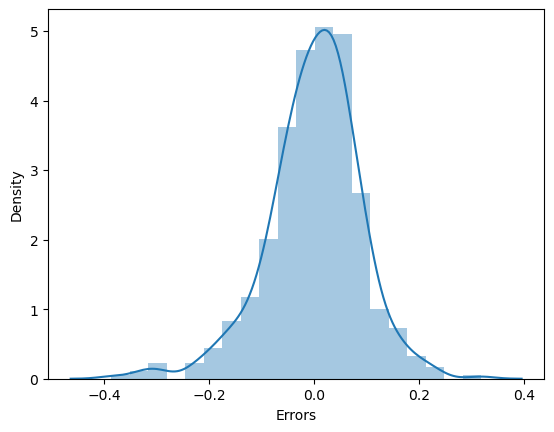

In [129]:
# Histogram of the error terms

sns.distplot(y_train-y_train_pred, bins = 20)
plt.xlabel('Errors')

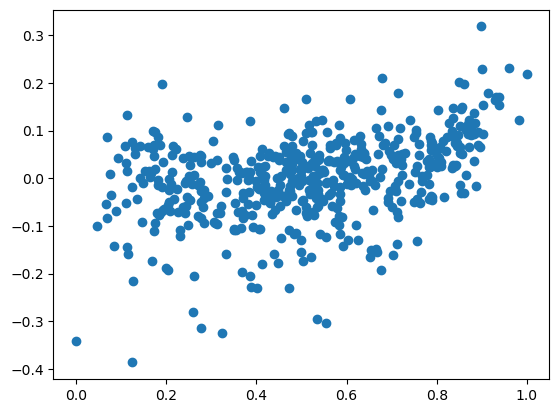

In [130]:
# Scatter plot to look for patterns in residual.
plt.scatter(y_train, y_train-y_train_pred)

#### Inference of Residual analysis.

- Error terms are forming a normal distribution curve with mean at zero.
- No visible patterns in error terms, data is evenly disctibuted across vertical axis with center at 0.

hence we can say that our model is following the assumptions of linear regression and our model is good for prediction.

### 8. MAKING PREDICTION ON TEST SET.

In [133]:
# Scaling test numerical variables.
df_test[['temp','atemp','hum','windspeed','cnt']] = scaler.transform(df_test[['temp','atemp','hum','windspeed','cnt']])

In [134]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow or light Rain,Mist+Cloudy
instant,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
185,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
536,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
300,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
222,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
153,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [135]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow or light Rain,Mist+Cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [136]:
## We can see that all the values of numerical variable in test set are not between 0 and 1 as they have taken min/ max values from train set.

In [137]:
# creating X and y test sets.
y_test = df_test.pop('cnt')
X_test = df_test

In [138]:
y_test

instant
185    0.692706
536    0.712034
300    0.303382
222    0.547400
153    0.569029
         ...   
703    0.757478
128    0.495973
641    0.868615
73     0.232858
654    0.864243
Name: cnt, Length: 220, dtype: float64

In [139]:
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow or light Rain,Mist+Cloudy
instant,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
185,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
536,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
300,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
222,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
153,0,0,1,0.817246,0.741471,0.314298,0.537414,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [140]:
# Matching columns in test set same as train set.
X_test_new = X_test[X_train_new.columns]

In [141]:
X_test_new.head()

,yr,holiday,temp,hum,windspeed,summer,winter,Jan,Jul,Sep,Light Snow or light Rain,Mist+Cloudy
instant,,,,,,,,,,,,
185,0,1,0.831783,0.657364,0.084219,0,0,0,1,0,0,1
536,1,0,0.901354,0.610133,0.153728,1,0,0,0,0,0,0
300,0,0,0.511964,0.837699,0.334206,0,1,0,0,0,0,1
222,0,0,0.881625,0.437098,0.339570,0,0,0,0,0,0,0
153,0,0,0.817246,0.314298,0.537414,1,0,0,0,0,0,0


In [142]:
# Adding constant column in X_test set.
X_test_sm = sm.add_constant(X_test_new)

In [143]:
# predicting values for test set.
y_test_pred = res4.predict(X_test_sm)

In [144]:
y_test_pred

instant
185    0.391787
536    0.926169
300    0.397827
222    0.604922
153    0.627073
         ...   
703    0.705665
128    0.525389
641    0.818735
73     0.303717
654    0.729093
Length: 220, dtype: float64

### 8. MODEL EVALUATION

In [146]:
r2_train = r2_score(y_train,y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

In [147]:
print('train :', round(r2_train,3))
print('test :', round(r2_test,3))

train : 0.841
test : 0.803


<Axes: xlabel='cnt'>

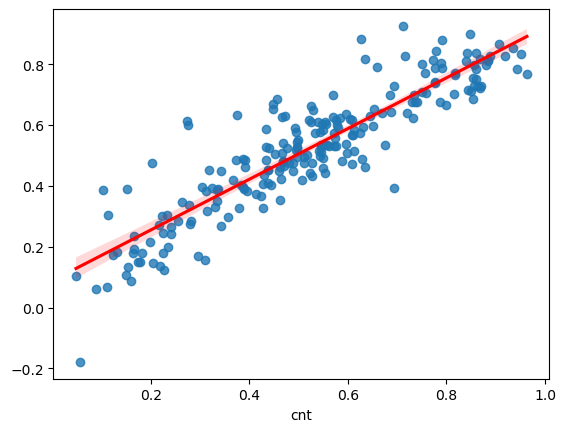

In [148]:
sns.regplot(x = y_test,y = y_test_pred, line_kws={'color':'red'})

In [149]:
res4.params

const                       0.244945
yr                          0.228921
holiday                    -0.098037
temp                        0.571530
hum                        -0.177897
windspeed                  -0.194777
summer                      0.075636
winter                      0.124753
Jan                        -0.038226
Jul                        -0.046810
Sep                         0.094356
Light Snow or light Rain   -0.234939
Mist+Cloudy                -0.050354
dtype: float64

##### Equation of cnt from linear model is:-

$cnt = 0.244945 + 0.228921 \times yr - 0.098037 \times holiday + 0.571530 \times temp - 0.177897 \times hum - 0.194777 \times windspeed + 0.075636 \times summer + 0.124753 \times winter - 0.038226 \times Jan + 0.094356 \times Sep - 0.046810 \times Jul - 0.234939 \times Light Snow or light Rain - 0.050354 \times Mist+Cloudy$

#### Model Parameters.

R Squared value for Train set : 0.841
<br>
R Squared Value for test set : 0.803

#### Interpretation.

Variables significant in predicting the demand for shared bikes : 
<br>
- Year(Seems demand increasing year by year).
- If the day is a holiday.
- Ambient factors like temperature, Humidity, Windspeed.
- Seasons of Summer and Winter.
- Months of January, July and September.
- Weather conditions like Light Snow or light Rain and Mist+Cloudy.

**factors that increase the count of bookings** : Year, Temperature, Summer, Winter and month of sepetember.

**Factors that decrease the count of bookings** : Light Snow or light Rain, Mist+Cloudy, Month of July and January, Holiday, High windspeed and humidity.

**Top 5 Factors that affect customer count(in descending order)** : Temperature, Light Snow or light Rain, year, Windspeed and humidity.